# Impact of Discounted ARR on Churn Rate for Product

# Importing Libaries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset 

In [93]:
df_product = pd.read_csv("../staging/data_set/cleaned_product.csv")
df_expansion = pd.read_csv("../staging/data_set/cleaned_expansion.csv")

# Convert date and extract year-month

In [94]:
df_product["score_date"] = pd.to_datetime(df_product["score_date"], errors="coerce")
df_product["year_month"] = df_product["score_date"].dt.to_period("M").astype(str)

df_expansion["score_date"] = pd.to_datetime(df_expansion["score_date"], errors="coerce")
df_expansion["year_month"] = df_expansion["score_date"].dt.to_period("M").astype(str)


# Compute churn function

In [95]:
def compute_churn(df_expansion, col):
    churn = (df_expansion[col] <   0).astype(int)
    return churn


df_expansion["product_churn"] = compute_churn(df_expansion, "product_change_arr")


# Compute churn for product

In [96]:
df_merged = pd.merge(df_product, df_expansion, on=["id","year_month"], how="left")

weekly_churn = df_merged.groupby("discount_arr_usd")["product_churn"].sum().reset_index()

# Visualization

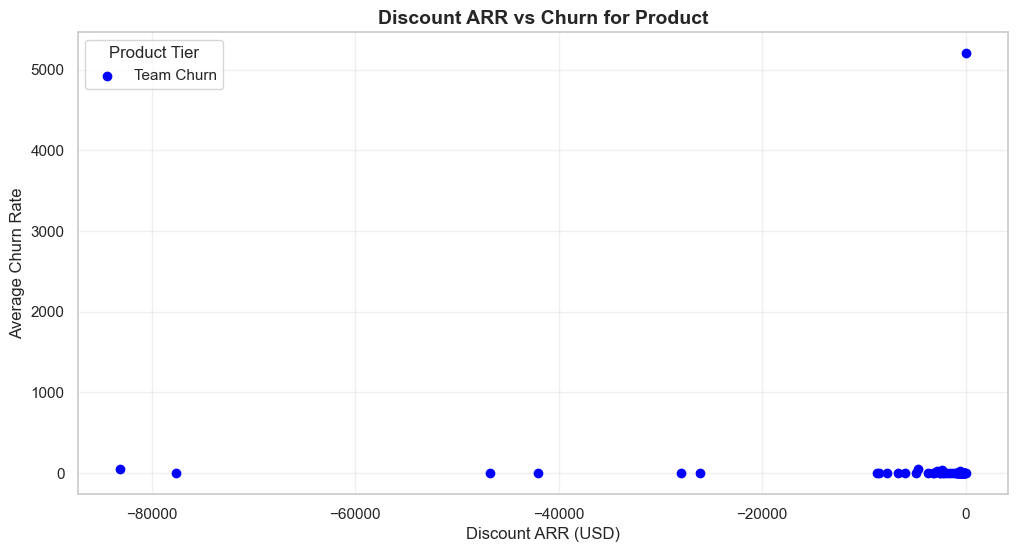

In [97]:
# Apply seaborn style
sns.set_theme(style="whitegrid")

# Plot Discount ARR vs Churn with scatter points
plt.figure(figsize=(12, 6))
plt.scatter(weekly_churn["discount_arr_usd"],weekly_churn["product_churn"]  , label="Team Churn", color="blue")

# Improve title and labels
plt.title("Discount ARR vs Churn for Product", fontsize=14, fontweight="bold")
plt.xlabel("Discount ARR (USD)", fontsize=12)
plt.ylabel("Average Churn Rate", fontsize=12)

# Add legend and grid
plt.legend(title="Product Tier")
plt.grid(alpha=0.3)

plt.show()